# **Import Necessary Packages and Load DataSet**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
if IN_COLAB:
    data = pd.read_csv('/content/BankChurners.csv')  # Need to upload to google colab and change name to 'DA_data.csv'
else:
    data = pd.read_csv('./Inputs/BankChurners.csv')

# **Initial Anaysis Of DataSet**

In [ ]:
data.head(10)

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0  768805383  ...                                            0.99991                                                                                
1  818770008  ...                                            0.99994                                                                                
2  713982108  ...                                            0.99998                                                                                
3  769911858  ...                                            0.99987                                                                                
4  709106358  ...                                            0.99998                                                                                
5  713061558  ...                                            0.99994                                                                                
6  810347208  ...                                            0.99988                                                                                
7  818906208  ...                                            0.99991                                                                                
8  710930508  ...                                            0.99996                                                                                
9  719661558  ...                                            0.99970                                                                                

[10 rows x 23 columns]

CHECKING FOR NULL 

In [ ]:
data.isnull().any()

CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

No NUll values are present in the dataset

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

The data has no duplicate values also

Removing unneccesary comlumns

In [ ]:
#data = data.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
data = data.iloc[:,0:21]

PREPROCESSING OF THE DATA(checking for the null,missing data,removing col)

In [ ]:
data.head(5)

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0  768805383  Existing Customer  ...                1.625                 0.061
1  818770008  Existing Customer  ...                3.714                 0.105
2  713982108  Existing Customer  ...                2.333                 0.000
3  769911858  Existing Customer  ...                2.333                 0.760
4  709106358  Existing Customer  ...                2.500                 0.000

[5 rows x 21 columns]

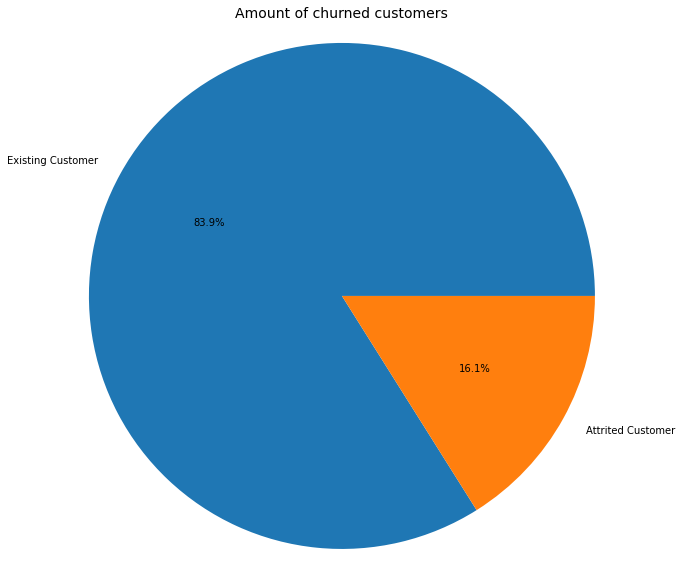

In [ ]:
target = data["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots(1,1,figsize = (10,10))

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

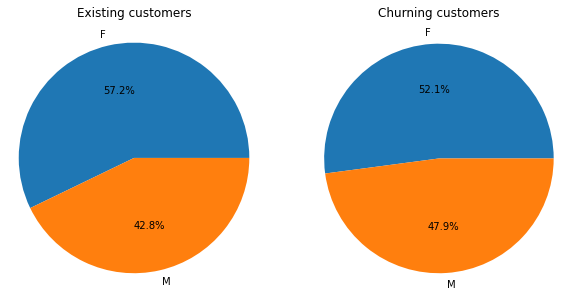

In [ ]:
churned = data[data['Attrition_Flag'] == "Attrited Customer"]
nonchurned = data[data['Attrition_Flag'] == "Existing Customer"]
churnedtarget = churned["Gender"].value_counts()
nonchurnedtarget = nonchurned["Gender"].value_counts()

fig1, axs = plt.subplots(1, 2,figsize = (10,5))
axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

# **Attributes and Churned vs Existing Count**

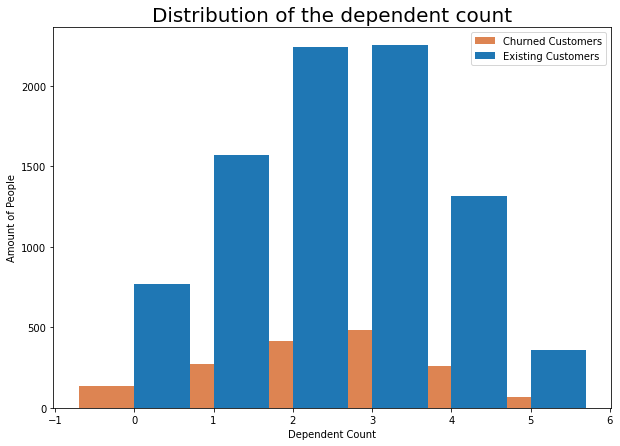

In [ ]:
N = 6
ChurnedCounts = churned["Dependent_count"].value_counts().sort_index()
NonChurnedCounts = nonchurned["Dependent_count"].value_counts().sort_index()

ind = np.arange(N)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

figs, axs = plt.subplots(figsize=(10,7))

axs.bar(ind - width/2, ChurnedCounts, width, color = "#DD8452")
axs.bar(ind + width/2, NonChurnedCounts, width)

axs.set_xlabel('Dependent Count')
axs.set_ylabel('Amount of People')
axs.set_title('Distribution of the dependent count', fontsize=20)
axs.legend(('Churned Customers','Existing Customers',))

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


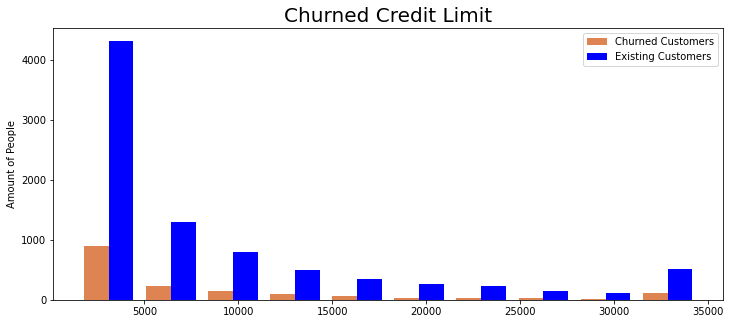

In [ ]:
column = "Credit_Limit"
category_name = "Credit Limit" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8452','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


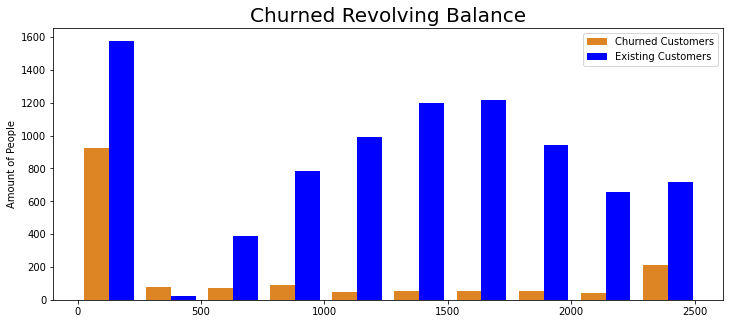

In [ ]:
column = "Total_Revolving_Bal"
category_name = "Revolving Balance" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425', 'b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


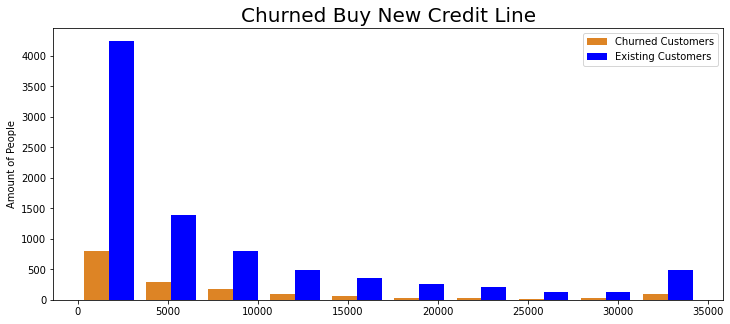

In [ ]:
column = "Avg_Open_To_Buy"
category_name = "Buy New Credit Line" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425', 'b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


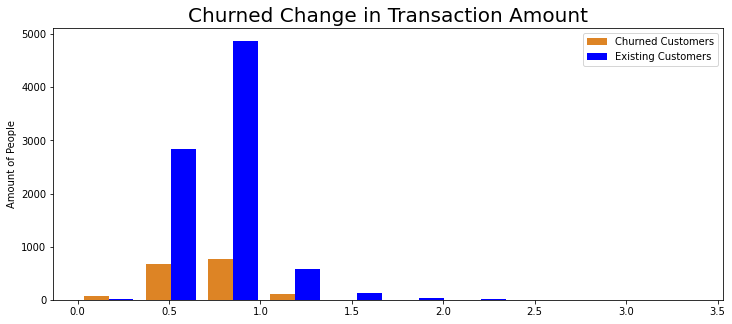

In [ ]:
column = "Total_Amt_Chng_Q4_Q1"
category_name = "Change in Transaction Amount" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


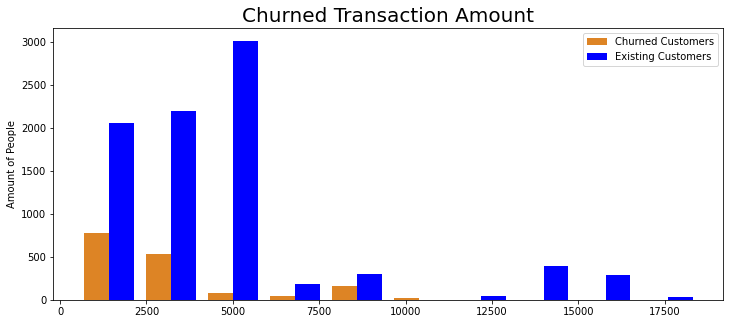

In [ ]:
column = "Total_Trans_Amt"
category_name = "Transaction Amount" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


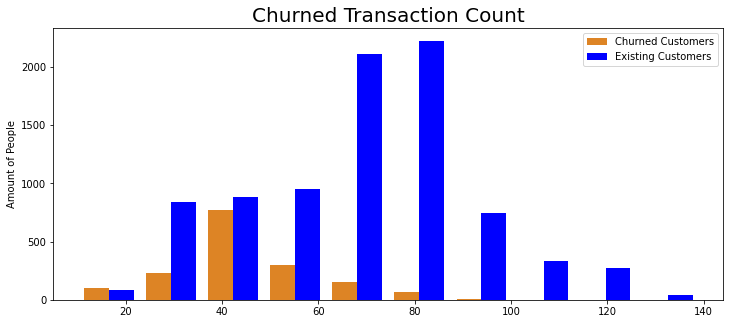

In [ ]:
column = "Total_Trans_Ct"
category_name = "Transaction Count" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


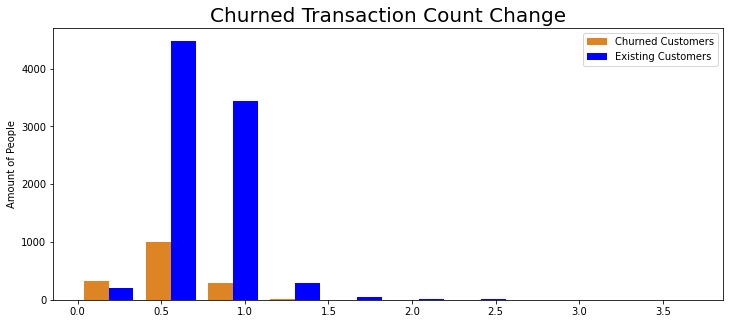

In [ ]:
column = "Total_Ct_Chng_Q4_Q1"
category_name = "Transaction Count Change" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


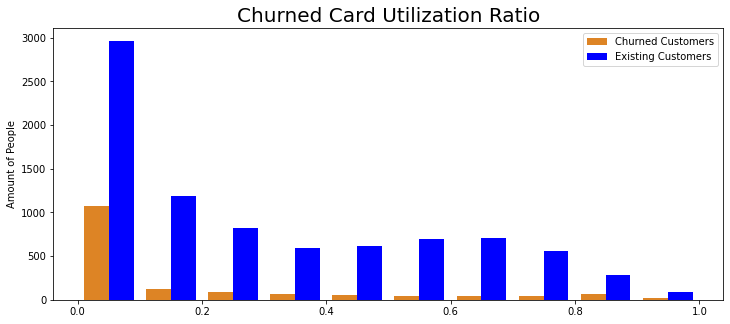

In [ ]:
column = "Avg_Utilization_Ratio"
category_name = "Card Utilization Ratio" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

In [ ]:
NumericalColumns = data.select_dtypes(exclude='object').columns.tolist()
CategoricalColumns = data.select_dtypes(include='object').columns.tolist()
print("Numerical Columns: \n" ,NumericalColumns)
print("\nCategorical Columns: \n",CategoricalColumns)

Numerical Columns: 
 ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical Columns: 
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [ ]:
for i in CategoricalColumns:
    print(i,'\n',data[i].unique(),'\n\n',data[i].value_counts(),'\n')

Attrition_Flag 
 ['Existing Customer' 'Attrited Customer'] 

 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Gender 
 ['M' 'F'] 

 F    5358
M    4769
Name: Gender, dtype: int64 

Education_Level 
 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Marital_Status 
 ['Married' 'Single' 'Unknown' 'Divorced'] 

 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Income_Category 
 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 

 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Card_Category 
 ['Blue' 'Gold

# **Numerical Column Data Analytics**

> ## **Checking Distribution of every Numerical column in the dataset**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c66f005d0>,
      dtype=object)

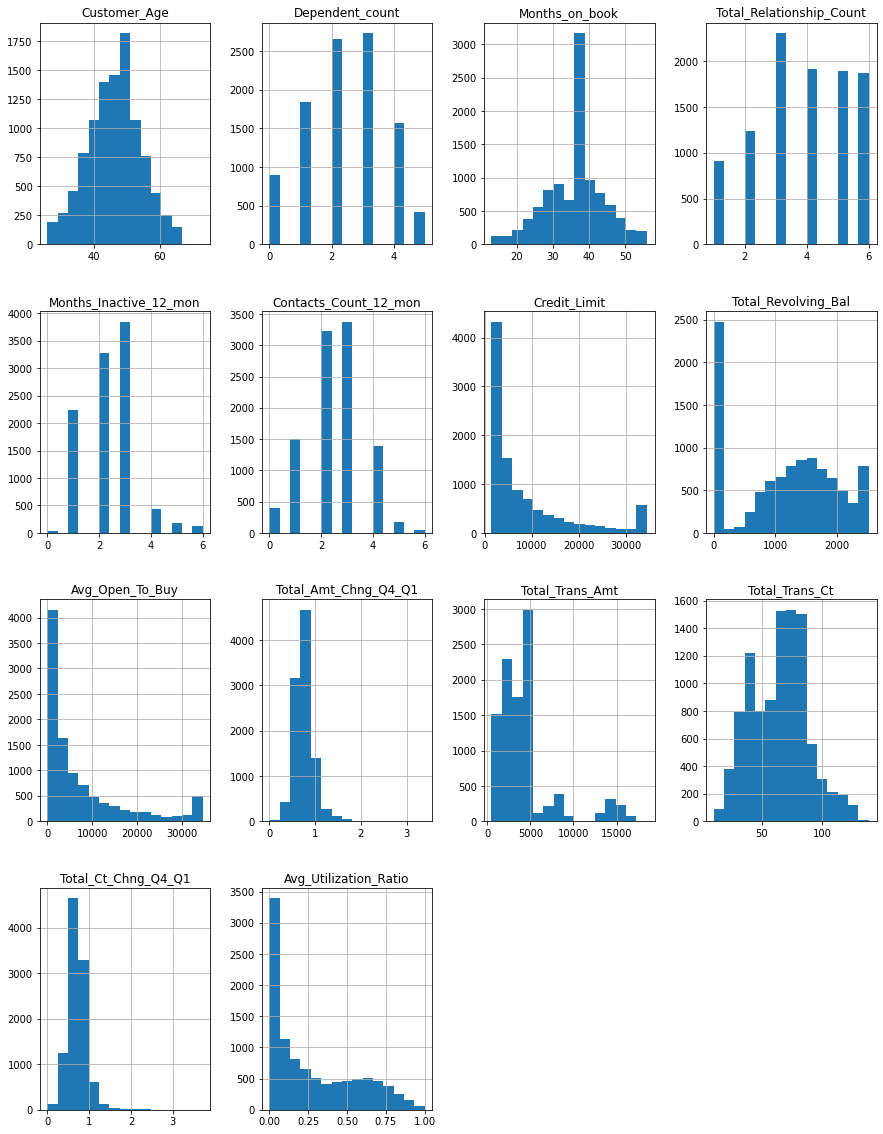

In [ ]:
data[NumericalColumns[1:]].hist(bins=15, figsize=(15, 20))

> ## **Kernel Density plot for Numerical Features**

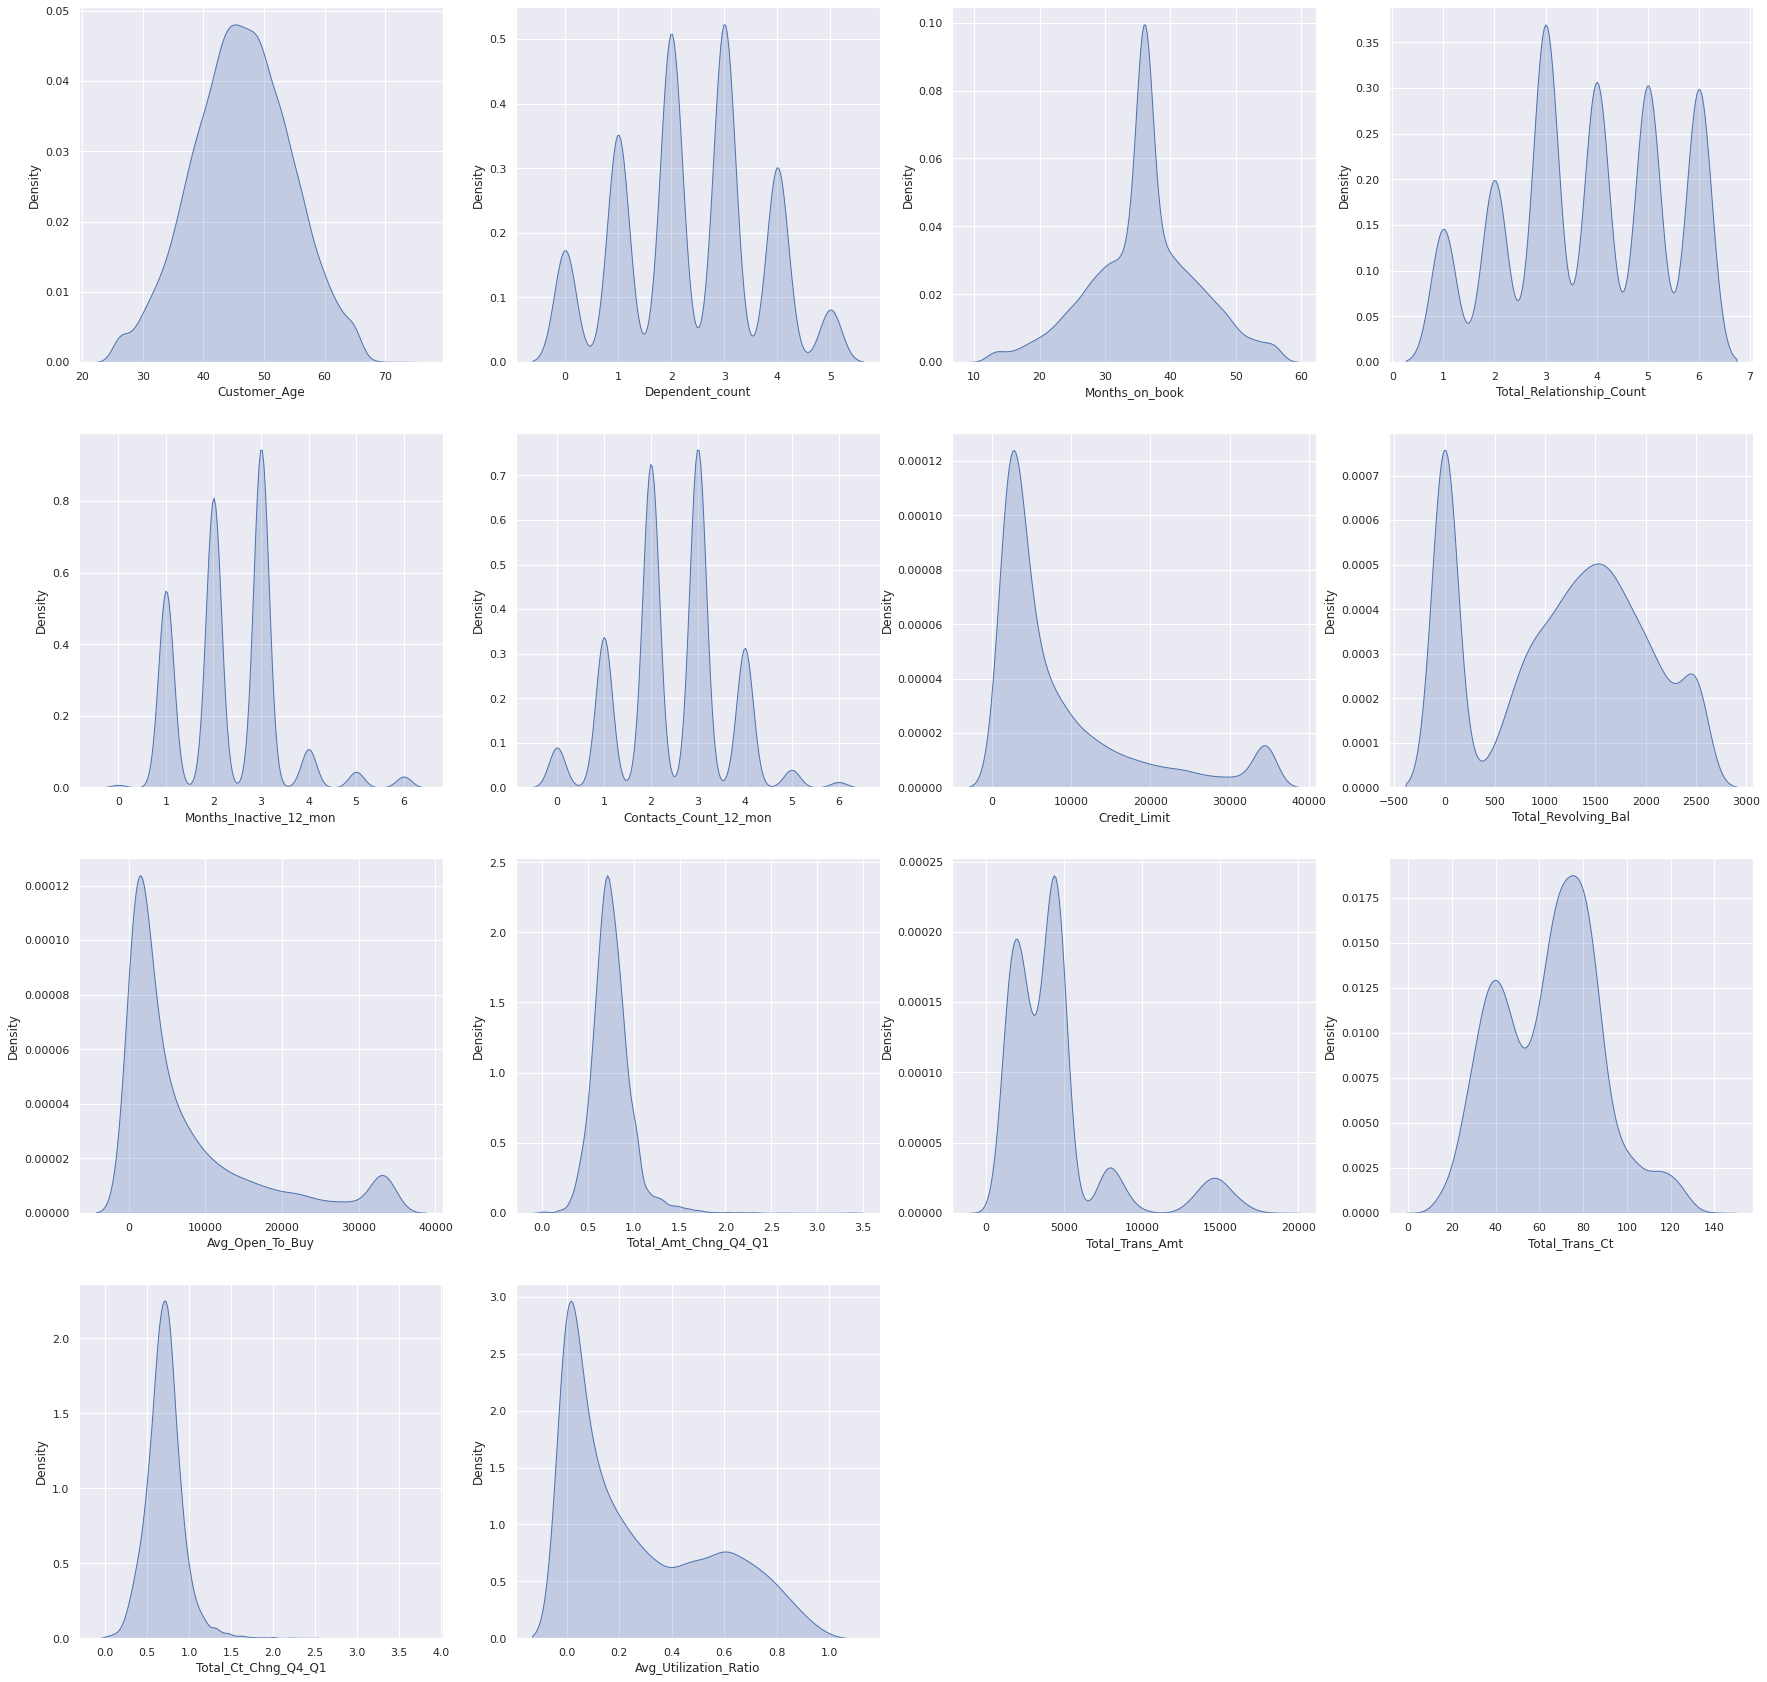

In [ ]:
sns.set(rc={'figure.figsize': (30, 30)})
for i in range(1,len(NumericalColumns)):
    plt.subplot(4, 4, (i-1) + 1)
    sns.kdeplot(data[NumericalColumns[i]], shade=True)

> ## **Data Description for every Numerical Column**

In [ ]:
data.describe().iloc[:,1:]  # Removing 1st Column as doesn't have any numerical value wrt count,mean etc

Customer_Age  ...  Avg_Utilization_Ratio
count  10127.000000  ...           10127.000000
mean      46.325960  ...               0.274894
std        8.016814  ...               0.275691
min       26.000000  ...               0.000000
25%       41.000000  ...               0.023000
50%       46.000000  ...               0.176000
75%       52.000000  ...               0.503000
max       73.000000  ...               0.999000

[8 rows x 14 columns]

> ## **Box Plots of Numerical Columns with respect to Attrition Flag**

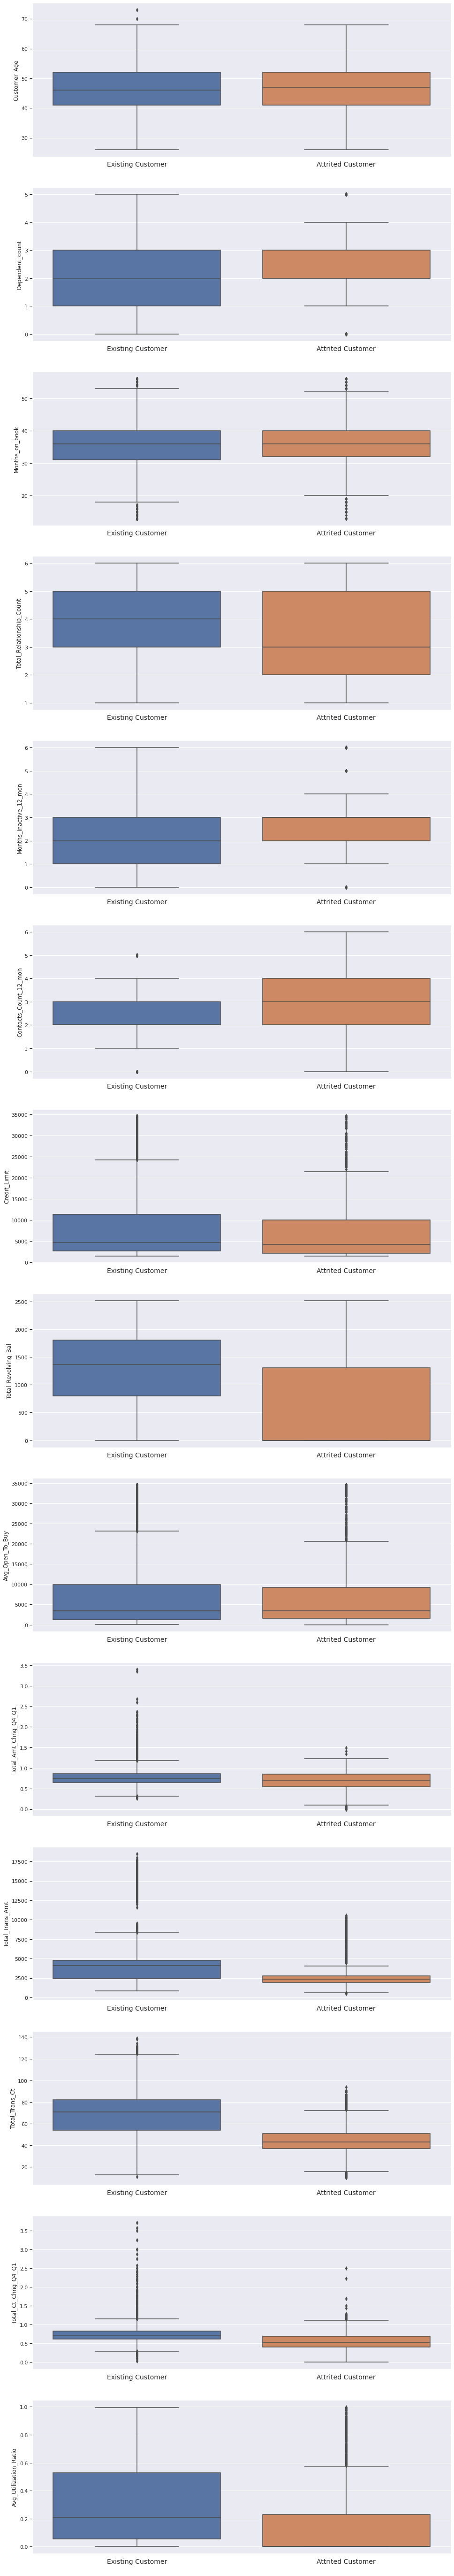

In [ ]:
fig, ax = plt.subplots(nrows=14, figsize=(16, 100))
i = 0 #counter
for cols in NumericalColumns[1:]:
  sns.boxplot(data = data, y=cols, x='Attrition_Flag', ax=ax[i])
  ax[i].set_xlabel(' ')
  ax[i].xaxis.set_tick_params(labelsize=14)
  ax[i].tick_params(left=True, labelleft=True)
  ax[i].set_ylabel(cols, fontsize=12)
  i=i+1

> ## **Collinearity Check**

[Text(0, 0.5, 'CLIENTNUM'),
 Text(0, 1.5, 'Customer_Age'),
 Text(0, 2.5, 'Dependent_count'),
 Text(0, 3.5, 'Months_on_book'),
 Text(0, 4.5, 'Total_Relationship_Count'),
 Text(0, 5.5, 'Months_Inactive_12_mon'),
 Text(0, 6.5, 'Contacts_Count_12_mon'),
 Text(0, 7.5, 'Credit_Limit'),
 Text(0, 8.5, 'Total_Revolving_Bal'),
 Text(0, 9.5, 'Avg_Open_To_Buy'),
 Text(0, 10.5, 'Total_Amt_Chng_Q4_Q1'),
 Text(0, 11.5, 'Total_Trans_Amt'),
 Text(0, 12.5, 'Total_Trans_Ct'),
 Text(0, 13.5, 'Total_Ct_Chng_Q4_Q1'),
 Text(0, 14.5, 'Avg_Utilization_Ratio')]

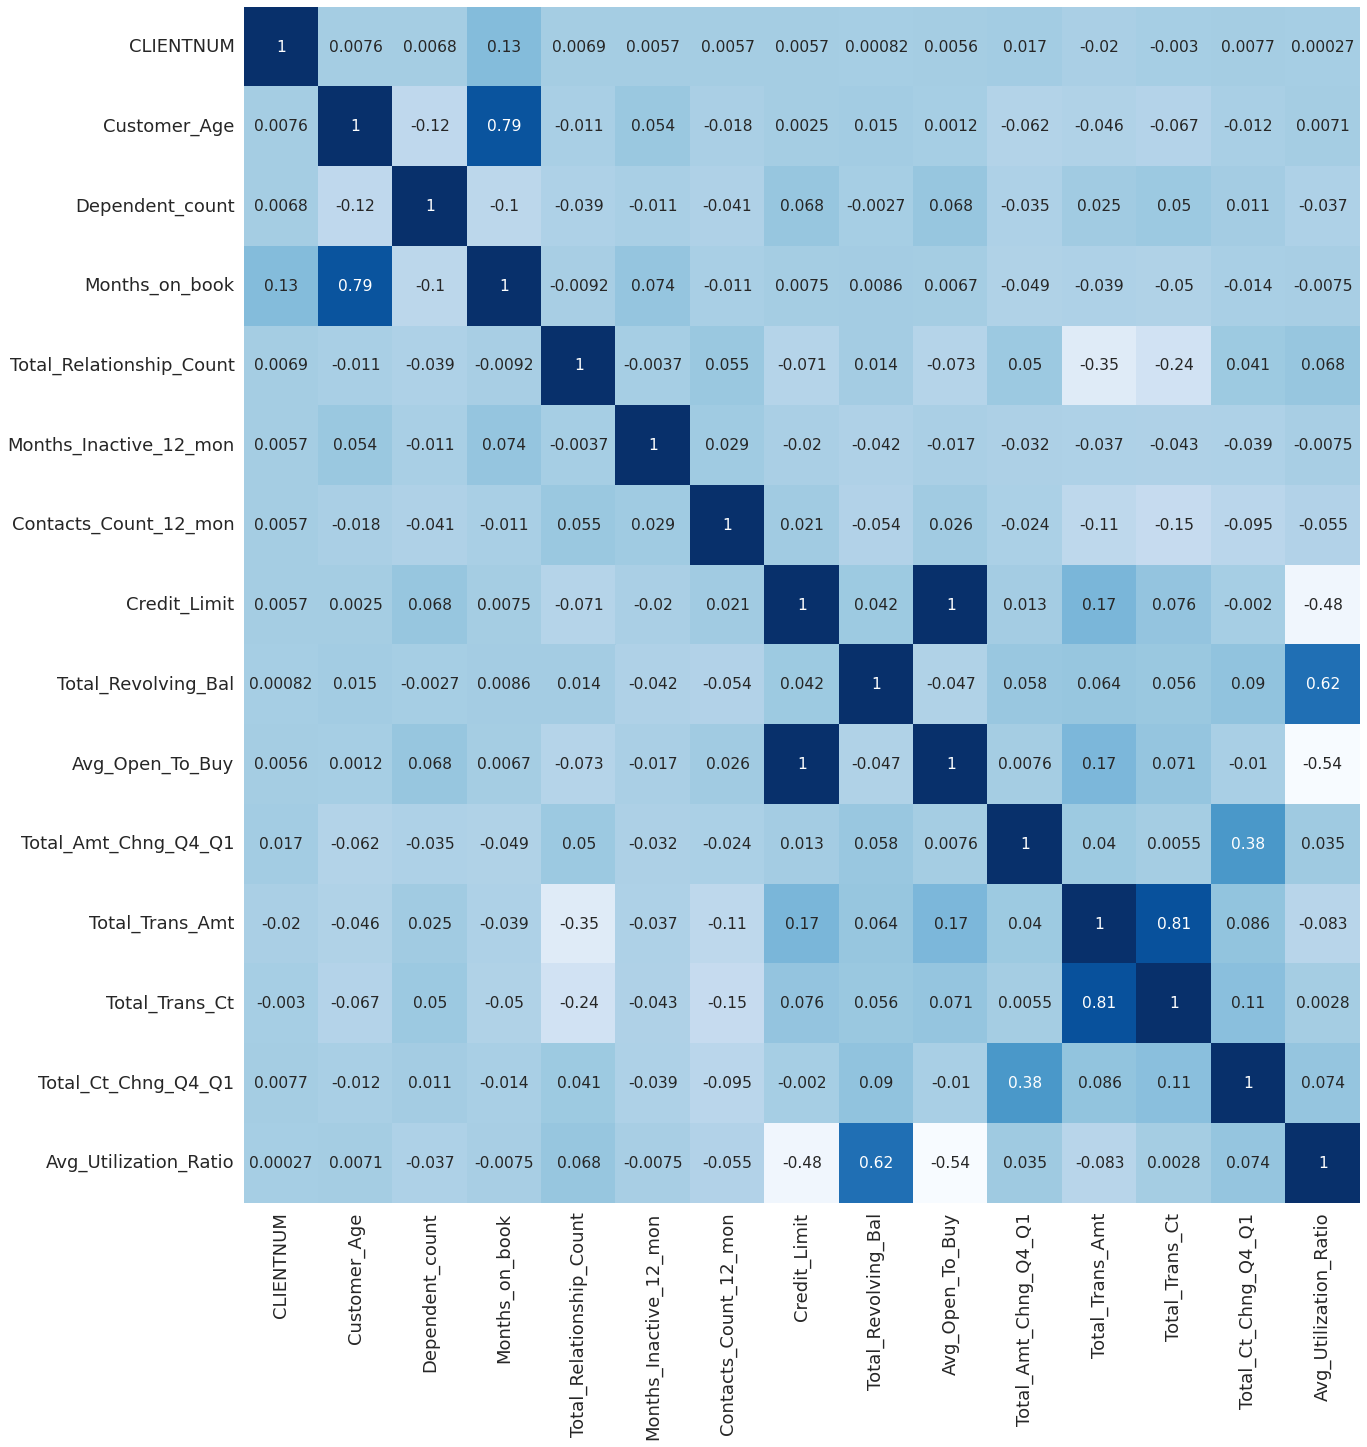

In [ ]:
fig, ax = plt.subplots( figsize = (20,22) )
res = sns.heatmap( data.corr(), cmap='Blues', annot=True, ax = ax, annot_kws={"size": 15.5}, cbar=False)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

In [ ]:
PositiveCorrelationresults = data.corr()[ (data.corr() > 0.3)]  # Correlation coefficient values below 0.3 are considered to be weak; 0.3-0.7 are moderate; >0.7 are strong
PositiveCorrelationresults

CLIENTNUM  ...  Avg_Utilization_Ratio
CLIENTNUM                       1.0  ...                    NaN
Customer_Age                    NaN  ...                    NaN
Dependent_count                 NaN  ...                    NaN
Months_on_book                  NaN  ...                    NaN
Total_Relationship_Count        NaN  ...                    NaN
Months_Inactive_12_mon          NaN  ...                    NaN
Contacts_Count_12_mon           NaN  ...                    NaN
Credit_Limit                    NaN  ...                    NaN
Total_Revolving_Bal             NaN  ...               0.624022
Avg_Open_To_Buy                 NaN  ...                    NaN
Total_Amt_Chng_Q4_Q1            NaN  ...                    NaN
Total_Trans_Amt                 NaN  ...                    NaN
Total_Trans_Ct                  NaN  ...                    NaN
Total_Ct_Chng_Q4_Q1             NaN  ...                    NaN
Avg_Utilization_Ratio           NaN  ...               1.000000

[15 rows x 15 columns]

In [ ]:
NegativeCorrelationresults = data.corr()[ (data.corr() < -0.3)]  
NegativeCorrelationresults

CLIENTNUM  ...  Avg_Utilization_Ratio
CLIENTNUM                       NaN  ...                    NaN
Customer_Age                    NaN  ...                    NaN
Dependent_count                 NaN  ...                    NaN
Months_on_book                  NaN  ...                    NaN
Total_Relationship_Count        NaN  ...                    NaN
Months_Inactive_12_mon          NaN  ...                    NaN
Contacts_Count_12_mon           NaN  ...                    NaN
Credit_Limit                    NaN  ...              -0.482965
Total_Revolving_Bal             NaN  ...                    NaN
Avg_Open_To_Buy                 NaN  ...              -0.538808
Total_Amt_Chng_Q4_Q1            NaN  ...                    NaN
Total_Trans_Amt                 NaN  ...                    NaN
Total_Trans_Ct                  NaN  ...                    NaN
Total_Ct_Chng_Q4_Q1             NaN  ...                    NaN
Avg_Utilization_Ratio           NaN  ...                    NaN

[15 rows x 15 columns]

The output dataframes can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. As mentioned earlier, that the correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00.

**Note: NaN Values suggest that the correlation between the columns are not significant enough to be considered**. It doesn't specify that there is no correlation among the variables

> ## **Scatter Plots based on Above Results**

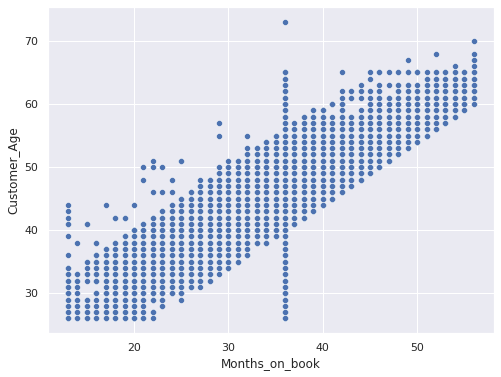

In [ ]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Months_on_book', y='Customer_Age', data = data)

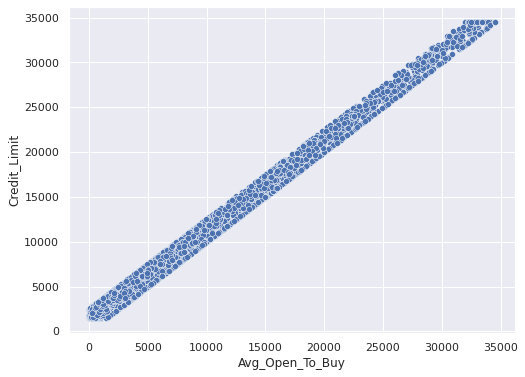

In [ ]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Avg_Open_To_Buy', y='Credit_Limit', data = data)

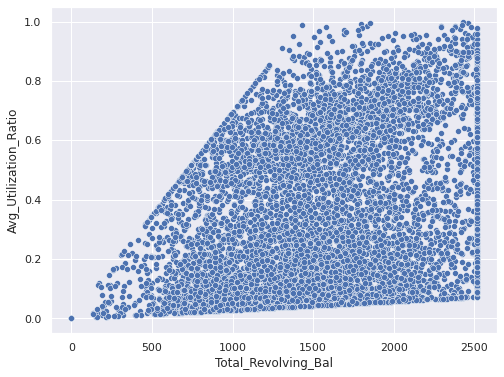

In [ ]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', data = data)

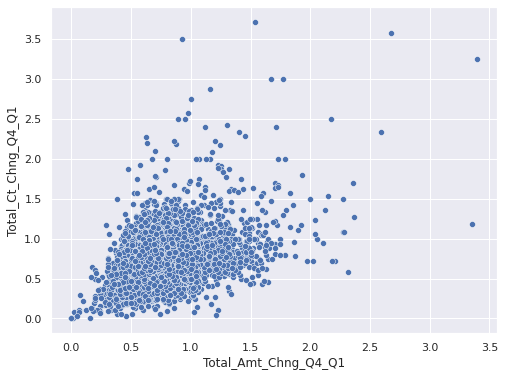

In [ ]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', data = data)

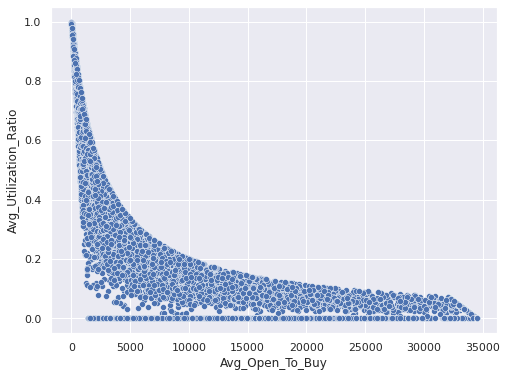

In [ ]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Avg_Open_To_Buy', y='Avg_Utilization_Ratio', data = data)

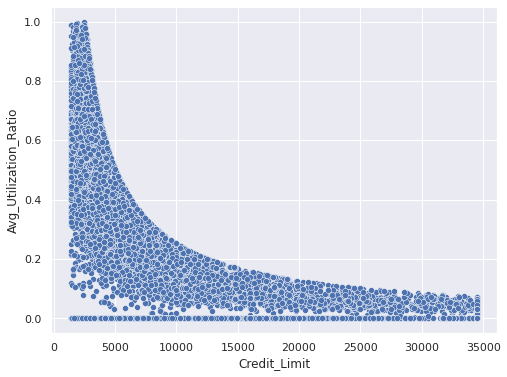

In [ ]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Credit_Limit', y='Avg_Utilization_Ratio', data = data)

> ## **Diagnostic Plots**

In [ ]:
import scipy.stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(9, 4))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    scipy.stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


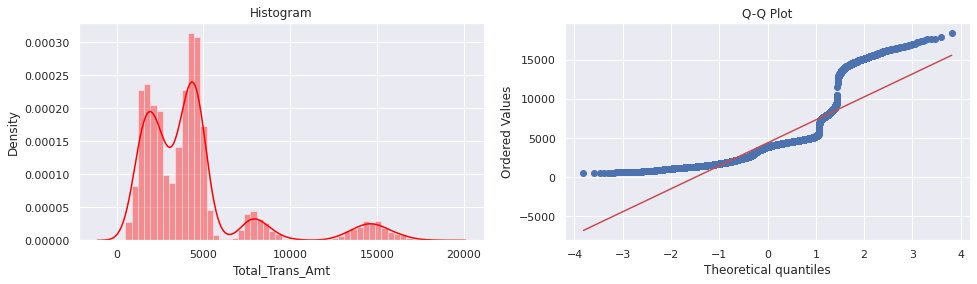

In [ ]:
diagnostic_plot(data, 'Total_Trans_Amt')

# **Categorical Column Data Analytics**

> ## **Count Plots for Each Categorical Attributes**

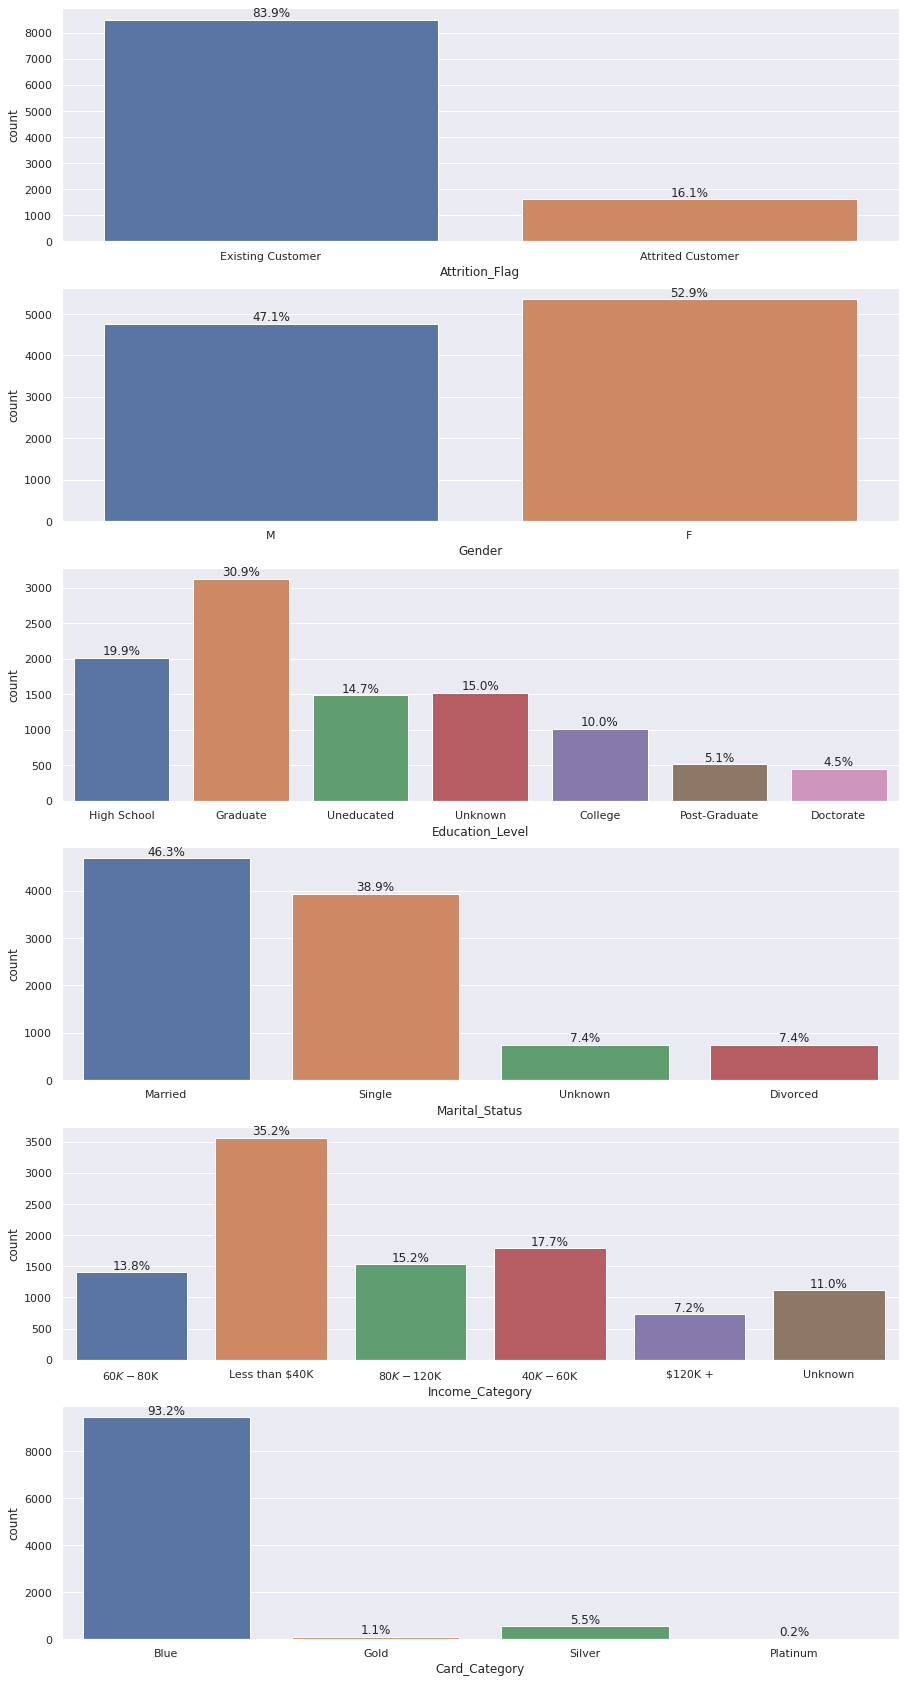

In [ ]:
fig,ax = plt.subplots(6,1,figsize = (15,30))

for attr,plot in zip(CategoricalColumns,ax.flatten()):
  CountPlt = sns.countplot(x = data[attr],ax = plot)
  for p in CountPlt.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ncount = len(data[attr])
    CountPlt.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text


# **Model Selection,Building,Training and Validation**

## **Dataset Encoding** ðŸ’»

### **Categorical Variable Encoding**

In [ ]:
# get_dummies helps convert categorical data into dummy values
df1 = pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df1.shape)

(10127, 39)


In [ ]:
df = df1[[ 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Customer_Age', 'Total_Relationship_Count', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver','Attrition_Flag']]

In [ ]:
df.head(10)

Dependent_count  ...     Attrition_Flag
0                3  ...  Existing Customer
1                5  ...  Existing Customer
2                3  ...  Existing Customer
3                4  ...  Existing Customer
4                3  ...  Existing Customer
5                2  ...  Existing Customer
6                4  ...  Existing Customer
7                0  ...  Existing Customer
8                3  ...  Existing Customer
9                2  ...  Existing Customer

[10 rows x 38 columns]

### **Min - Max Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [ ]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [ ]:
scaled_features.head()

Dependent_count  ...  Card_Category_Silver
0              0.6  ...                   0.0
1              1.0  ...                   0.0
2              0.6  ...                   0.0
3              0.8  ...                   0.0
4              0.6  ...                   0.0

[5 rows x 37 columns]

## **Train and Test Dataset Split**

In [ ]:
X = scaled_features
y = df['Attrition_Flag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

## **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

For the prediction process we create a combination of models which would collectively gives us predictions and hence we would have near average accuracy of all models used in the combination<br>

We use the following models <br>
1. AdaBoost
2. Gradient Boosting Classifier
3. Random Forest Classifier
4. Extra Trees Classifier
5. Decision Tree Classifier
6. Support Vector Machine
7. Bagging Classifier

### **Model Building and Training**

In [ ]:
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))
clrs.append(SVC(random_state = rs))
clrs.append(BaggingClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    print(clr)
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["AdaBoostClassifier","Gradient Boosting","RandomForestClassifier",'ExtraTreesClassifier','DecisionTreeClassifier','Support Vector','Bagging Classifier']})
print(cv_df)

AdaBoostClassifier(random_state=15)
GradientBoostingClassifier(random_state=15)
RandomForestClassifier(random_state=15)
ExtraTreesClassifier(random_state=15)
DecisionTreeClassifier(random_state=15)
SVC(random_state=15)
BaggingClassifier(random_state=15)
   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.955932        0.005984      AdaBoostClassifier
1              0.964449        0.006362       Gradient Boosting
2              0.954698        0.006984  RandomForestClassifier
3              0.928157        0.006437    ExtraTreesClassifier
4              0.933219        0.006555  DecisionTreeClassifier
5              0.904457        0.005608          Support Vector
6              0.955809        0.006502      Bagging Classifier


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


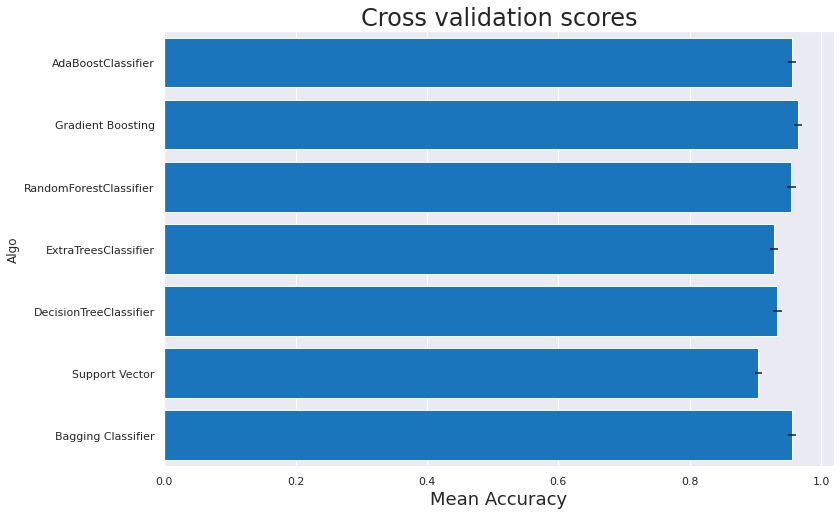

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#0078d7')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)

In [ ]:
for clrsInstance in clrs:
  clrsInstance.fit(X_train,y_train)

### **Classification Report and Confusion Matrix**

In [ ]:
Classifiers = ["AdaBoostClassifier","Gradient Boosting","RandomForestClassifier",'ExtraTreesClassifier','DecisionTreeClassifier','Support Vector','Bagging Classifier']
for i in range(len(clrs)):
  print('\n',Classifiers[i],'\n')
  y_pred = clrs[i].predict(X_test)
  confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred))
  print("Accuracy",accuracy_score(y_test, y_pred))
  print('----------------------------------------------------------------------------------------------------------')


 AdaBoostClassifier 

                   precision    recall  f1-score   support

Attrited Customer       0.88      0.83      0.85       309
Existing Customer       0.97      0.98      0.97      1717

         accuracy                           0.96      2026
        macro avg       0.93      0.90      0.91      2026
     weighted avg       0.96      0.96      0.96      2026

Accuracy 0.9565646594274433
----------------------------------------------------------------------------------------------------------

 Gradient Boosting 

                   precision    recall  f1-score   support

Attrited Customer       0.93      0.84      0.89       309
Existing Customer       0.97      0.99      0.98      1717

         accuracy                           0.97      2026
        macro avg       0.95      0.92      0.93      2026
     weighted avg       0.97      0.97      0.97      2026

Accuracy 0.9669299111549852
------------------------------------------------------------------------------

### **Combining Models** 

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[i for i in zip(Classifiers,clrs)],voting='hard')
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)
#print(results.mean(),results.std())

In [ ]:
print(pd.DataFrame({"CrossVal_Score_Means":[results.mean()],"CrossValerrors": [results.std()],"Algo":['Ensemble Model']}))

   CrossVal_Score_Means  CrossValerrors            Algo
0              0.960006        0.006239  Ensemble Model
